In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# check to see that the test and training folders with the seedling data is present in Colab
!ls "/content/drive/My Drive/DLproject/seedlingsToColab"

res.csv  test  train


In [4]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

K.set_image_dim_ordering( 'tf' )


Using TensorFlow backend.


In [0]:
pathToTrain = "/content/drive/My Drive/DLproject/seedlingsToColab/train/"
testPath = "/content/drive/My Drive/DLproject/seedlingsToColab/test/"

In [6]:
listing = os.listdir( pathToTrain ) 
num_folders = len(listing)
print ( num_folders)
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 71
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "/content/drive/My Drive/DLproject/seedlingsToColab/train/" + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")
  

12
Small-flowered Cranesbill
Sugar beet
Black-grass
Scentless Mayweed
Loose Silky-bent
Common Chickweed
Maize
Fat Hen
Shepherds Purse
Charlock
Common wheat
Cleavers
2405.1515510082245  seconds


In [7]:
trainImagesPaths[1] 

'/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/5fa533084.png'

In [0]:
trainImgNParray = np.asarray(trainImg) 
trainlabel = pd.DataFrame(trainImagesCategories) 

In [7]:
len(trainImgNParray)

4750

In [8]:
len(trainlabel)

4750

In [18]:
trainImgNParray[1].shape

(71, 71, 3)

In [19]:
type(trainImgNParray) 

numpy.ndarray

In [20]:
len(trainImagesPaths)

4750

In [21]:
print(trainImagesPaths[0:5])

['/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/ba08ca84c.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/5fa533084.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/42db489c6.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/3ad4ad205.png', '/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/39070241e.png']


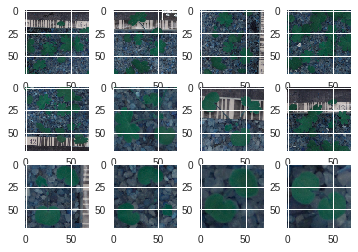

In [9]:
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(trainImg[i])

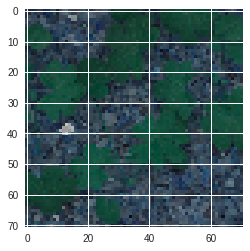

In [23]:
plt.imshow(trainImg[3])

In [24]:
im = trainImg[3]
im.shape

(71, 71, 3)

In [25]:
trainArray[7][0]

'/content/drive/My Drive/DLproject/seedlingsToColab/train/Small-flowered Cranesbill/ff07b2015.png'

In [26]:
trainArray[7][1]

'Small-flowered Cranesbill'

In [27]:
trainImgNParray.shape

(4750, 71, 71, 3)

In [28]:
trainlabel.shape

(4750, 1)

In [ ]:
## Removing background with mask

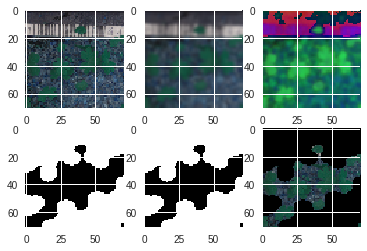

In [9]:
clearTrainImg = []
examples = []; getEx = True
for img in trainImgNParray:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
    
    # Convert to HSV image
    hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
    
    # Create mask (parameters - green color range)
    lower_green = (25, 40, 50)
    upper_green = (75, 255, 255)
    mask = cv2.inRange(hsvImg, lower_green, upper_green)  
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    clearTrainImg.append(clear)  # Append image without backgroung
    
    # Show examples
    if getEx:
        plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
        plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
        plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
        plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
        plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
        plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
        getEx = False

clearTrainImg = np.asarray(clearTrainImg)

In [0]:
# normalize the training data
clearTrainImg = clearTrainImg/255

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


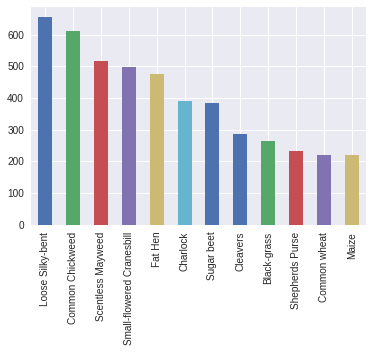

In [11]:
# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(trainlabel[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainlabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainlabel[0].value_counts().plot(kind='bar')

In [32]:
clearTrainImg.dtype

dtype('float64')

In [33]:
clearTrainLabel.dtype

dtype('float32')

In [0]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(clearTrainImg, clearTrainLabel, 
                                                test_size=0.10, random_state=seed, 
                                                stratify = clearTrainLabel)

In [14]:
trainX.shape

(4275, 71, 71, 3)

In [15]:
type(trainX)

numpy.ndarray

In [37]:
testX.shape

(475, 71, 71, 3)

In [38]:
type(testX)

numpy.ndarray

In [39]:
trainY.shape

(4275, 12)

In [40]:
type(trainY)

numpy.ndarray

In [41]:
testY.shape

(475, 12)

In [148]:
type(testY)

numpy.ndarray

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,
        vertical_flip=True 
    )  
datagen.fit(trainX)

In [ ]:
### CNN Model ####

In [43]:
model = Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(scaleTo, scaleTo, 3))) 
model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_clases, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 69, 69, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         147584    
__________

In [44]:
t0=time.time()
history_A = model.fit_generator(datagen.flow(trainX, trainY, batch_size=75), epochs=35, validation_data=(testX, testY), verbose=2)
t1=time.time()
print(t1-t0," seconds")

# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/35
 - 9s - loss: 2.0863 - acc: 0.2667 - val_loss: 1.7924 - val_acc: 0.3347
Epoch 2/35
 - 7s - loss: 1.7706 - acc: 0.3640 - val_loss: 1.6580 - val_acc: 0.3958
Epoch 3/35
 - 7s - loss: 1.6052 - acc: 0.4218 - val_loss: 1.4579 - val_acc: 0.4758
Epoch 4/35
 - 7s - loss: 1.4172 - acc: 0.5074 - val_loss: 1.2801 - val_acc: 0.5642
Epoch 5/35
 - 7s - loss: 1.2844 - acc: 0.5415 - val_loss: 1.1467 - val_acc: 0.6000
Epoch 6/35
 - 7s - loss: 1.2077 - acc: 0.5792 - val_loss: 1.0865 - val_acc: 0.6379
Epoch 7/35
 - 7s - loss: 1.1295 - acc: 0.6091 - val_loss: 1.0558 - val_acc: 0.6568
Epoch 8/35
 - 7s - loss: 1.0102 - acc: 0.6592 - val_loss: 0.9799 - val_acc: 0.6737
Epoch 9/35
 - 7s - loss: 0.9676 - acc: 0.6744 - val_loss: 0.8963 - val_acc: 0.6884
Epoch 10/35
 - 7s - loss: 0.9224 - acc: 0.6837 - val_loss: 0.9253 - val_acc: 0.6947
Epoch 11/35
 - 7s - loss: 0.8512 - acc: 0.7153 - val_loss: 0.7980 - val_acc: 0.7242
Epoch 12/35
 - 7s - loss: 0.8195 - acc: 0.7198 - val_loss: 0.7813 - val_acc: 0.7326
E

In [ ]:
## Accuracy Scores for model

In [45]:
print(model.evaluate(trainX, trainY))  # Evaluate on train set
print(model.evaluate(testX, testY))  # Evaluate on test set

4275/4275 [==============================] - 1s 276us/step
[0.337275075117747, 0.883508772055308]
475/475 [==============================] - 0s 275us/step
[0.3938442005609211, 0.8715789468664872]


In [ ]:
## Plots for model

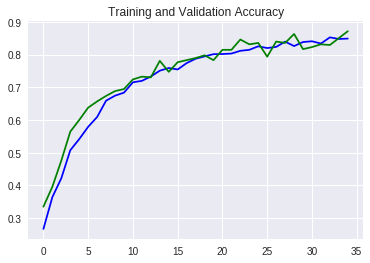

In [46]:
# plot training accuracies
plt.plot(history_A.history['acc'],'b') #train acc
plt.plot(history_A.history['val_acc'],'g') #val acc
plt.title('Training and Validation Accuracy model') 
plt.show()

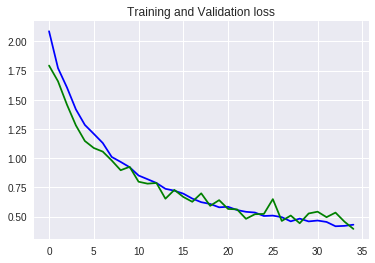

In [47]:
# plot training and validation loss
plt.plot(history_A.history['loss'],'b') #train loss
plt.plot(history_A.history['val_loss'],'g') #val loss
plt.title('Training and Validation loss model') 
plt.show()

In [ ]:
###The results of  model are a validation accuracy of 87% and an error rate of 13%.  The training and validation accuracies and losses converge nicely and there seems to be no overfitting.